# Iris Dataset (learning pandas)

### Importing and Loading

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from statistics import mean,median,mode
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
iris = load_iris()
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [3]:
df = pd.DataFrame(data = iris['data'],columns = iris['feature_names'])
target = pd.DataFrame(data = iris['target'])
df['target'] = target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
names = iris['target_names']
names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Reindex

In [5]:
columnsTitles = ['target','sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', ]
df.reindex(columns=columnsTitles).head(2)

,target,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2


#### describe()

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Mean, Median, Max, pd.unique
 * along row(x-axis) - axis = 1 
 * along column(y-axis) - axis = 0

In [7]:
df.mean(axis = 0).head()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
target               1.000000
dtype: float64

In [8]:
df.median(axis = 0).head()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

In [9]:
max(df['sepal length (cm)'])

7.9

In [10]:
pd.unique(df['sepal length (cm)'])

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [11]:
pd.unique(df['target'])

array([0, 1, 2], dtype=int64)

### df.iloc()
* iloc[rowPos1:rowPos2, colPos1:colPos2]

In [12]:
df.iloc[:2,1:3]

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4


### df.loc()
* loc[rowPos1:rowPos2,'name of column']

In [13]:
df.loc[:2,'sepal length (cm)']

0    5.1
1    4.9
2    4.7
Name: sepal length (cm), dtype: float64

In [14]:
df[df.target==0].head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


### Missing values

In [15]:
missing_val = df.isnull().sum() ### returns missing missing val per column.
missing_val

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [16]:
missing_val.sum()   ### returns total missing vals

0

### Renaming

In [17]:
df.rename(columns ={'sepal length (cm)':'sep_l',
                    'sepal width (cm)':'sep_w',
                    'petal length (cm)':'pet_l',
                    'petal width (cm)':'pet_w',},inplace = True)
df.head(2)

,sep_l,sep_w,pet_l,pet_w,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [18]:
sep_l = df.sep_l
sep_w = df.sep_w
pet_l = df.pet_l
pet_w = df.pet_w
target = df.target

### Plotting

#### Graph_1

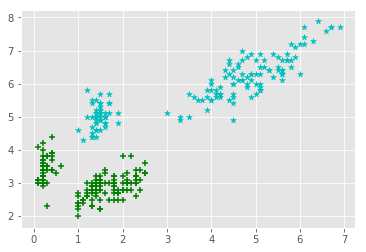

In [19]:
plt.scatter(pet_l,sep_l,c = 'c',marker = '*')
plt.scatter(pet_w,sep_w,c = 'g',marker= '+')

#### Graph_2

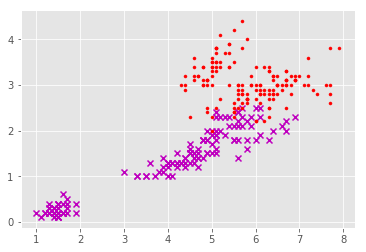

In [20]:
plt.scatter(pet_l,pet_w,c = 'm',marker= 'x')
plt.scatter(sep_l,sep_w,c = 'r',marker= '.')

In [21]:
tar_0 = df[df.target ==0 ]
tar_1 = df[df.target ==1 ]
tar_2 = df[df.target ==2 ] 

#### (pet_l,sep_l)

Text(0,0.5,'sep_l')

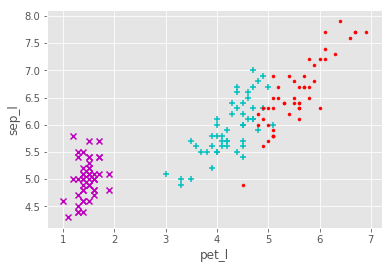

In [22]:
plt.scatter(tar_0.pet_l,tar_0.sep_l,c = 'm',marker= 'x')
plt.scatter(tar_1.pet_l,tar_1.sep_l,c = 'c',marker= '+')
plt.scatter(tar_2.pet_l,tar_2.sep_l,c = 'r',marker= '.')
plt.xlabel('pet_l')
plt.ylabel('sep_l')

#### (pet_w,sep_w)

Text(0,0.5,'sep_w')

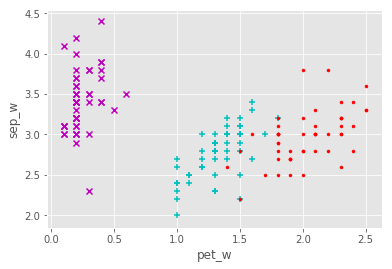

In [23]:
plt.scatter(tar_0.pet_w,tar_0.sep_w,c = 'm',marker= 'x')
plt.scatter(tar_1.pet_w,tar_1.sep_w,c = 'c',marker= '+')
plt.scatter(tar_2.pet_w,tar_2.sep_w,c = 'r',marker= '.')
plt.xlabel('pet_w')
plt.ylabel('sep_w')

#### (pet_l,pet_w)

Text(0,0.5,'pet_w')

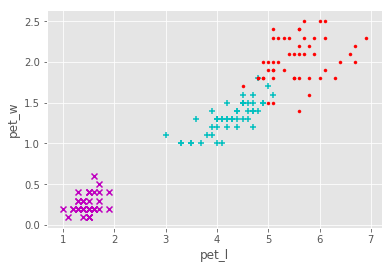

In [24]:
plt.scatter(tar_0.pet_l,tar_0.pet_w,c = 'm',marker= 'x')
plt.scatter(tar_1.pet_l,tar_1.pet_w,c = 'c',marker= '+')
plt.scatter(tar_2.pet_l,tar_2.pet_w,c = 'r',marker= '.')
plt.xlabel('pet_l')
plt.ylabel('pet_w')

#### (sep_l,sep_w)

Text(0,0.5,'sep_w')

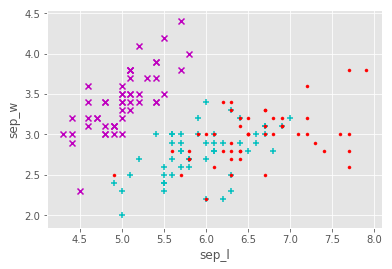

In [25]:
plt.scatter(tar_0.sep_l,tar_0.sep_w,c = 'm',marker= 'x')
plt.scatter(tar_1.sep_l,tar_1.sep_w,c = 'c',marker= '+')
plt.scatter(tar_2.sep_l,tar_2.sep_w,c = 'r',marker= '.')
plt.xlabel('sep_l')
plt.ylabel('sep_w')

#### (pet_l,sep_w)

Text(0,0.5,'sep_w')

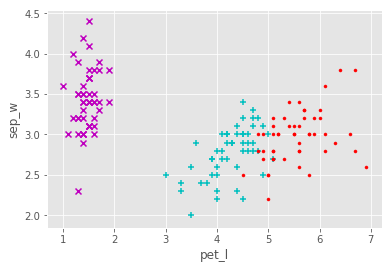

In [26]:
plt.scatter(tar_0.pet_l,tar_0.sep_w,c = 'm',marker= 'x')
plt.scatter(tar_1.pet_l,tar_1.sep_w,c = 'c',marker= '+')
plt.scatter(tar_2.pet_l,tar_2.sep_w,c = 'r',marker= '.')
plt.xlabel('pet_l')
plt.ylabel('sep_w')

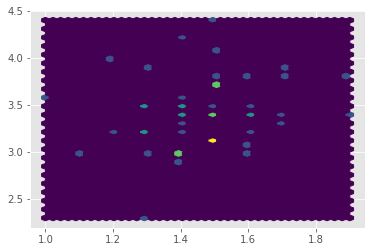

In [31]:
plt.hexbin(tar_0.pet_l,tar_0.sep_w,gridsize = 40)

In [ ]:
fig, axarr = plt.subplots(211)
axarr[0].scatter(tar_0.pet_l,tar_0.sep_w,c = 'm',marker= 'x',ax= axarr[0])
#plt.scatter(tar_1.pet_l,tar_1.sep_w,c = 'c',marker= '+')